In [1]:
import pandas as pd
import numpy as np
import glob
from openpyxl import load_workbook

import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
# Load the Excel file
workbook = load_workbook(filename='lstmmodel/SHARE PRICES 1990 - 2020.xlsx', read_only=True)

# Get a list of all sheet names in the workbook
sheet_names = workbook.sheetnames

# Loop through all sheets and save each to a separate CSV file
for sheet_name in sheet_names:
    # Load the sheet into a pandas dataframe
    sheet = pd.read_excel('lstmmodel/SHARE PRICES 1990 - 2020.xlsx', sheet_name=sheet_name)
    
    # Save the sheet to a CSV file with the same name as the sheet
    sheet.to_csv(f'lstmmodel/{sheet_name}.csv', index=False)


C:\Users\Benjamin\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [16]:
# Create a list of all CSV files in the directory
csv_files = glob.glob('lstmmodel/*.csv')

# Create an empty list to store the data frames
dfs = []

# Loop through the CSV files and import them as data frames
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Find the common column names across all data frames
common_cols = list(set.intersection(*[set(df.columns) for df in dfs]))

# Select only the common columns from each data frame
dfs_common = [df[common_cols] for df in dfs]



In [17]:
# Concatenate the data frames
merged_df = pd.concat(dfs_common)
# Convert the 'Date' column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%Y-%m-%d', errors='coerce')

# Check for rows with datetime conversion errors
rows_with_errors = merged_df.loc[merged_df['Date'].isnull()]

# Display rows with datetime conversion errors
print(rows_with_errors)
print(rows_with_errors.shape)

     GSR   SWL GWEB  CLYD   ETI Date  AYRTN   ALW   CAL   GCB  ...   PBC  \
7    9.5  0.05    -  0.03  0.16  NaT   0.08  0.09  0.99  4.46  ...  0.04   
8    9.5  0.05    -  0.03  0.16  NaT   0.08  0.09  1.02  4.47  ...  0.04   
9    9.5  0.05    -  0.03  0.15  NaT   0.08  0.09  0.99  4.47  ...  0.04   
10   9.5  0.05    -  0.03  0.15  NaT   0.08  0.09  0.99   4.5  ...  0.04   
11   9.5  0.05    -  0.03  0.15  NaT   0.08  0.09  0.99   4.5  ...  0.04   
..   ...   ...  ...   ...   ...  ...    ...   ...   ...   ...  ...   ...   
383  9.5  0.05    -  0.03  0.06  NaT    NaN  0.11  0.65  3.74  ...  0.03   
384  9.5  0.05    -  0.03  0.06  NaT    NaN  0.11  0.65   3.8  ...  0.03   
385  9.5  0.05    -  0.03  0.06  NaT    NaN  0.11  0.65   3.8  ...  0.03   
386  9.5  0.05    -  0.03  0.06  NaT    NaN  0.11  0.65   3.8  ...  0.03   
387  9.5  0.05    -  0.03  0.06  NaT    NaN  0.11  0.65   3.8  ...  0.03   

      UNIL CFAO   CPC   HFC  CMLT  BOPP TRANSOL   FML ABL  
7    17.78  NaN  0.02  0.69

In [18]:
merged_df.shape

(5765, 25)

In [11]:
# Sort the data frame by the 'Date' column
merged_df = merged_df.sort_values('Date').dropna(subset=['Date'])


# Reset the index
merged_df.reset_index(drop=True, inplace=True)

In [12]:
merged_df.head()

,GSR,SWL,GWEB,CLYD,ETI,Date,AYRTN,ALW,CAL,GCB,...,PBC,UNIL,CFAO,CPC,HFC,CMLT,BOPP,TRANSOL,FML,ABL
0,NaN,NaN,NaN,NaN,NaN,1990-11-12,NaN,-,NaN,-,...,NaN,1800.0,0,NaN,-,NaN,NaN,NaN,25.0,135.0
1,NaN,NaN,NaN,NaN,NaN,1990-11-20,NaN,-,NaN,-,...,NaN,1600.0,0,NaN,-,NaN,NaN,NaN,25.0,135.0
2,NaN,NaN,NaN,NaN,NaN,1990-11-23,NaN,-,NaN,-,...,NaN,1650.0,0,NaN,-,NaN,NaN,NaN,25.0,137.0
3,NaN,NaN,NaN,NaN,NaN,1990-11-27,NaN,-,NaN,-,...,NaN,1655.0,0,NaN,-,NaN,NaN,NaN,25.0,141.0
4,NaN,NaN,NaN,NaN,NaN,1990-11-30,NaN,-,NaN,-,...,NaN,1655.0,-,NaN,-,NaN,NaN,NaN,25.0,145.0


In [13]:
merged_df.tail()

,GSR,SWL,GWEB,CLYD,ETI,Date,AYRTN,ALW,CAL,GCB,...,PBC,UNIL,CFAO,CPC,HFC,CMLT,BOPP,TRANSOL,FML,ABL
5522,9.5,0.05,-,0.03,0.07,2020-11-06,NaN,0.1,0.69,4.2,...,0.03,13.98,NaN,0.02,0.4,0.11,2.50,-,2.45,NaN
5523,9.5,0.05,-,0.03,0.09,2020-12-02,NaN,0.1,0.95,4.85,...,0.03,14.00,NaN,0.02,0.58,0.09,2.86,-,4.10,NaN
5524,9.5,0.05,-,0.03,0.08,2020-12-03,NaN,0.1,0.92,4.8,...,0.03,13.98,NaN,0.02,0.58,0.10,2.85,-,4.07,NaN
5525,9.5,0.05,-,0.03,0.07,2020-12-05,NaN,0.1,0.78,4.38,...,0.03,13.98,NaN,0.02,0.5,0.11,2.65,-,4.00,NaN
5526,9.5,0.05,-,0.03,0.07,2020-12-06,NaN,0.1,0.69,4.05,...,0.03,13.98,NaN,0.02,0.4,0.11,2.50,-,2.09,NaN


In [14]:
print(f'The DataFrame has {len(merged_df)} rows and {merged_df.shape[1]} columns.')

The DataFrame has 5527 rows and 25 columns.


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5765 entries, 0 to 387
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   GSR      3073 non-null   float64       
 1   SWL      4082 non-null   float64       
 2   GWEB     3436 non-null   object        
 3   CLYD     3786 non-null   float64       
 4   ETI      3337 non-null   float64       
 5   Date     5527 non-null   datetime64[ns]
 6   AYRTN    3212 non-null   float64       
 7   ALW      5639 non-null   object        
 8   CAL      3713 non-null   float64       
 9   GCB      5639 non-null   object        
 10  SCB      5639 non-null   float64       
 11  GGBL     5639 non-null   float64       
 12  MLC      5639 non-null   object        
 13  GOIL     3133 non-null   float64       
 14  SIC      3088 non-null   float64       
 15  PBC      4376 non-null   float64       
 16  UNIL     5639 non-null   float64       
 17  CFAO     3343 non-null   object   

In [20]:
#List the columns for different datatypes:
print('List of all Columns: ')
print(merged_df.columns)
print('\n')
print('Integer Type: ')
Col_int = merged_df.select_dtypes(np.int64).columns
print(Col_int)
print('\n')
print('Float Type: ')
Col_float = merged_df.select_dtypes(np.float64).columns
print(Col_float)
print('\n')
print('Object Type: ')
Col_cat = merged_df.select_dtypes(object).columns
print(Col_cat)
print('\n')
print('Count:')
print(merged_df.dtypes.value_counts())

List of all Columns: 
Index(['GSR', 'SWL', 'GWEB', 'CLYD', 'ETI', 'Date', 'AYRTN', 'ALW', 'CAL',
       'GCB', 'SCB', 'GGBL', 'MLC', 'GOIL', 'SIC', 'PBC', 'UNIL', 'CFAO',
       'CPC', 'HFC', 'CMLT', 'BOPP', 'TRANSOL', 'FML', 'ABL'],
      dtype='object')


Integer Type: 
Index([], dtype='object')


Float Type: 
Index(['GSR', 'SWL', 'CLYD', 'ETI', 'AYRTN', 'CAL', 'SCB', 'GGBL', 'GOIL',
       'SIC', 'PBC', 'UNIL', 'CPC', 'CMLT', 'BOPP', 'FML', 'ABL'],
      dtype='object')


Object Type: 
Index(['GWEB', 'ALW', 'GCB', 'MLC', 'CFAO', 'HFC', 'TRANSOL'], dtype='object')


Count:
float64           17
object             7
datetime64[ns]     1
dtype: int64


In [21]:
merged_df.describe()

,GSR,SWL,CLYD,ETI,AYRTN,CAL,SCB,GGBL,GOIL,SIC,PBC,UNIL,CPC,CMLT,BOPP,FML,ABL
count,3073.000000,4082.000000,3786.000000,3337.000000,3212.000000,3713.000000,5639.000000,5639.000000,3133.000000,3088.000000,4376.000000,5639.000000,3980.000000,4479.000000,3742.000000,5639.000000,3334.000000
mean,3.600358,83.696884,238.679316,2079.180234,147.544175,719.536650,33281.639302,2037.546664,1.169630,0.294913,697.227996,3782.500514,194.806214,395.093755,1459.131553,3372.290946,602.967481
std,2.441381,127.792384,431.237559,5517.277723,348.027366,1524.795317,65445.550738,4066.988898,1.017599,0.146022,1182.152974,6895.082555,348.601006,637.558571,2753.536146,7170.685290,469.029691
min,1.800000,0.020000,0.030000,0.060000,0.070000,0.170000,8.490000,1.200000,0.140000,0.080000,0.030000,3.390000,0.010000,0.080000,0.450000,1.650000,0.080000
25%,1.990000,0.030000,0.030000,0.130000,0.100000,0.380000,20.200000,1.900000,0.310000,0.150000,0.090000,8.500000,0.020000,0.120000,1.640000,5.840000,234.000000
50%,2.750000,0.040000,0.040000,0.180000,0.170000,0.900000,65.000000,6.200000,0.960000,0.320000,0.200000,18.290000,0.020000,0.160000,3.220000,17.800000,510.500000
75%,3.100000,265.000000,0.080000,0.290000,0.180000,1.290000,21700.000000,950.000000,1.590000,0.400000,520.000000,1950.000000,530.000000,460.000000,7.240000,1215.000000,1150.000000
max,9.500000,290.000000,1605.000000,23200.000000,978.000000,7000.000000,308300.000000,21600.000000,5.010000,0.630000,3920.000000,27500.000000,1950.000000,1800.000000,13000.000000,36000.000000,1480.000000


In [22]:
merged_df.describe(include="object").transpose()

,count,unique,top,freq
GWEB,3436.0,8.0,0.04,790.0
ALW,5639,254,-,736
GCB,5639,1016,-,652
MLC,5639.0,187.0,0.09,513.0
CFAO,3343.0,118.0,0.03,323.0
HFC,5639,298,-,472
TRANSOL,3565.0,29.0,0.03,783.0


In [23]:
# Removes Data Duplicates while Retaining the First one
def remove_duplicate(data):
    data.drop_duplicates(keep="first", inplace=True)
    return "Checked Duplicates"

# Removes Duplicates from train data if any
remove_duplicate(merged_df)

'Checked Duplicates'

In general, it is recommended to keep the percentage of missing data below 5-10% of the total number of observations. However, this is not always possible or practical, and some models can tolerate higher percentages of missing data if they are properly handled.

There are various ways to handle missing data in machine learning, such as imputation (filling in missing values with estimated values), deletion (removing observations with missing values), or using algorithms that are specifically designed to handle missing data (such as decision trees and random forests).

Little, R. J. A., & Rubin, D. B. (2019). Statistical analysis with missing data. John Wiley & Sons.
Gelman, A., & Hill, J. (2007). Data analysis using regression and multilevel/hierarchical models. Cambridge University Press.
Schafer, J. L., & Graham, J. W. (2002). Missing data: our view of the state of the art. Psychological methods, 7(2), 147-177.

In [24]:
# Check for missing values
print('missing values:', merged_df.isnull().sum().sort_values(ascending = False))

missing values: GSR        2692
SIC        2677
GOIL       2632
AYRTN      2535
ETI        2428
ABL        2395
CFAO       2386
GWEB       2329
TRANSOL    2200
CAL        2052
BOPP       2023
CLYD       1979
CPC        1785
SWL        1683
PBC        1389
CMLT       1286
Date        202
UNIL        126
ALW         126
HFC         126
GGBL        126
SCB         126
GCB         126
FML         126
MLC         126
dtype: int64


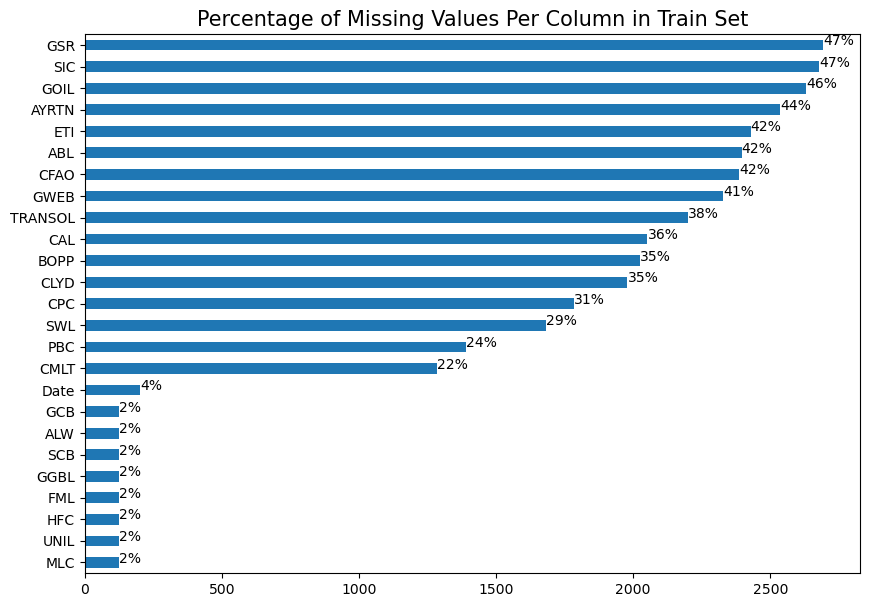

In [25]:
# Ploting any missing values in Data set
ax = merged_df.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/merged_df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [26]:
merged_df.replace('-', np.nan, inplace=True)


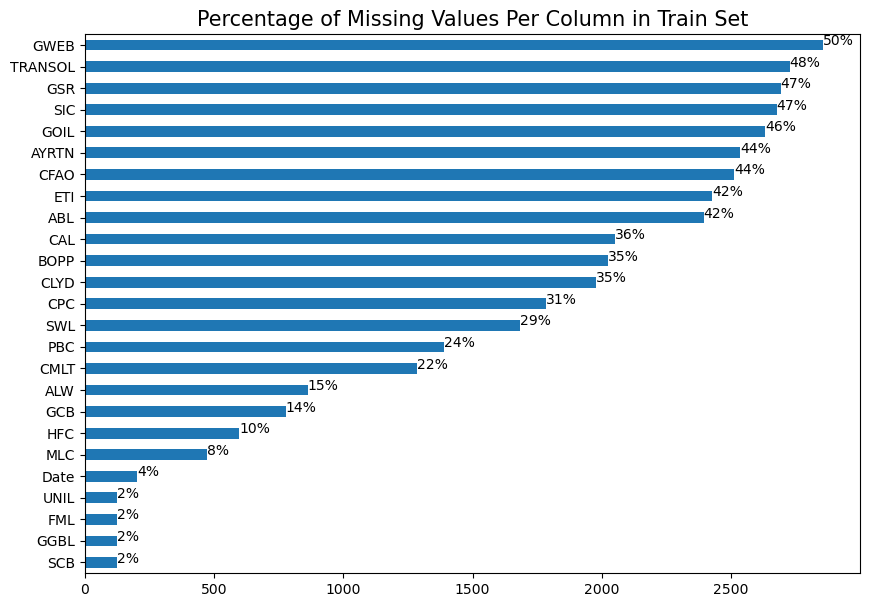

In [27]:
# Ploting any missing values in Data set after replacing - with nan
ax = merged_df.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/merged_df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))


Drop columns based on percentage of NaN values in columns, we can use a pandas dropna() function. It can delete the columns or rows of a dataframe that contains all or few NaN values.

In [28]:
# Calculate the percentage of missing values in each column
missing_percent = (merged_df.isna().sum() / merged_df.shape[0]) * 100

# Select the columns with missing values above 30%
cols_to_drop = missing_percent[missing_percent > 30].index

# Drop the selected columns
merged_df = merged_df.drop(cols_to_drop, axis=1)


In [29]:
merged_df.columns

Index(['SWL', 'Date', 'ALW', 'GCB', 'SCB', 'GGBL', 'MLC', 'PBC', 'UNIL', 'HFC',
       'CMLT', 'FML'],
      dtype='object')

In [30]:
merged_df.head()

,SWL,Date,ALW,GCB,SCB,GGBL,MLC,PBC,UNIL,HFC,CMLT,FML
0,NaN,1990-11-12,NaN,NaN,200.0,83.0,NaN,NaN,1800.0,NaN,NaN,25.0
1,NaN,1990-11-20,NaN,NaN,200.0,85.0,NaN,NaN,1600.0,NaN,NaN,25.0
2,NaN,1990-11-23,NaN,NaN,200.0,85.0,NaN,NaN,1650.0,NaN,NaN,25.0
3,NaN,1990-11-27,NaN,NaN,255.0,86.0,NaN,NaN,1655.0,NaN,NaN,25.0
4,NaN,1990-11-30,NaN,NaN,255.0,84.0,NaN,NaN,1655.0,NaN,NaN,25.0


In [31]:
merged_df.shape

(5729, 12)

In [32]:
print(merged_df.dtypes)


SWL            float64
Date    datetime64[ns]
ALW             object
GCB             object
SCB            float64
GGBL           float64
MLC             object
PBC            float64
UNIL           float64
HFC             object
CMLT           float64
FML            float64
dtype: object


In [33]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d/%m/%Y')
merged_df['HFC'] = pd.to_numeric(merged_df['HFC'], errors='coerce')
merged_df['MLC'] = pd.to_numeric(merged_df['MLC'], errors='coerce')
merged_df['ALW'] = pd.to_numeric(merged_df['ALW'], errors='coerce')
merged_df['GCB'] = pd.to_numeric(merged_df['GCB'], errors='coerce')
merged_df = merged_df.sort_values('Date')
merged_df = merged_df[['Date'] + [col for col in merged_df.columns if col != 'Date']]


In [34]:
merged_df.head()

,Date,SWL,ALW,GCB,SCB,GGBL,MLC,PBC,UNIL,HFC,CMLT,FML
0,1990-11-12,NaN,NaN,NaN,200.0,83.0,NaN,NaN,1800.0,NaN,NaN,25.0
1,1990-11-20,NaN,NaN,NaN,200.0,85.0,NaN,NaN,1600.0,NaN,NaN,25.0
2,1990-11-23,NaN,NaN,NaN,200.0,85.0,NaN,NaN,1650.0,NaN,NaN,25.0
3,1990-11-27,NaN,NaN,NaN,255.0,86.0,NaN,NaN,1655.0,NaN,NaN,25.0
4,1990-11-30,NaN,NaN,NaN,255.0,84.0,NaN,NaN,1655.0,NaN,NaN,25.0


In [35]:
merged_df.tail()

,Date,SWL,ALW,GCB,SCB,GGBL,MLC,PBC,UNIL,HFC,CMLT,FML
370,NaT,0.05,0.11,3.40,15.5,1.2,0.09,0.03,13.98,0.4,0.11,1.80
379,NaT,0.05,0.11,3.74,15.0,1.2,0.09,0.03,13.98,0.4,0.11,1.75
382,NaT,0.05,0.11,3.74,15.0,1.2,0.09,0.03,13.98,0.4,0.11,1.75
383,NaT,0.05,0.11,3.74,15.0,1.2,0.09,0.03,13.98,0.4,0.11,1.65
384,NaT,0.05,0.11,3.80,15.0,1.2,0.09,0.03,13.98,0.4,0.11,1.65


In [36]:
merged_df.to_csv(f'lstmmodel/SharePrice.csv', index=False)